# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import os

In [3]:
# Get the current working directory
current_dir = os.getcwd()

# Move up one level from the current directory
parent_dir = os.path.dirname(current_dir)

# Specify the file path
file_path = os.path.join(parent_dir, 'dataset', 'booking_data.csv')
print(file_path)  # Print to verify the file path
df = pd.read_csv(r"{}".format(file_path),encoding='latin-1')

c:\Users\hamin\Desktop\British-Airway\dataset\booking_data.csv


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [10]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

## Data Cleaning

In [11]:
df.route

0        AKLDEL
1        AKLDEL
2        AKLDEL
3        AKLDEL
4        AKLDEL
          ...  
49995    PERPNH
49996    PERPNH
49997    PERPNH
49998    PERPNH
49999    PERPNH
Name: route, Length: 50000, dtype: object

In [12]:
# Create new columns flight_origin and flight_destination
df['flight_origin'] = df['route'].str[:3]
df['flight_destination'] = df['route'].str[-3:]

In [13]:
def remove_outliers(df, column_name):
    """
    Remove outliers from a specific column in the DataFrame based on the interquartile range (IQR) method.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_name: str
        The name of the column for which outliers are to be removed.

    Returns:
    - df_filtered: DataFrame
        The DataFrame with outliers removed for the specified column.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the specified column
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Calculate the number of rows removed
    removed_rows = len(df) - len(df_filtered)
    print(f"Removed {removed_rows} rows due to outliers in column '{column_name}'.")

    return df_filtered

## EDA

### Univariate

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


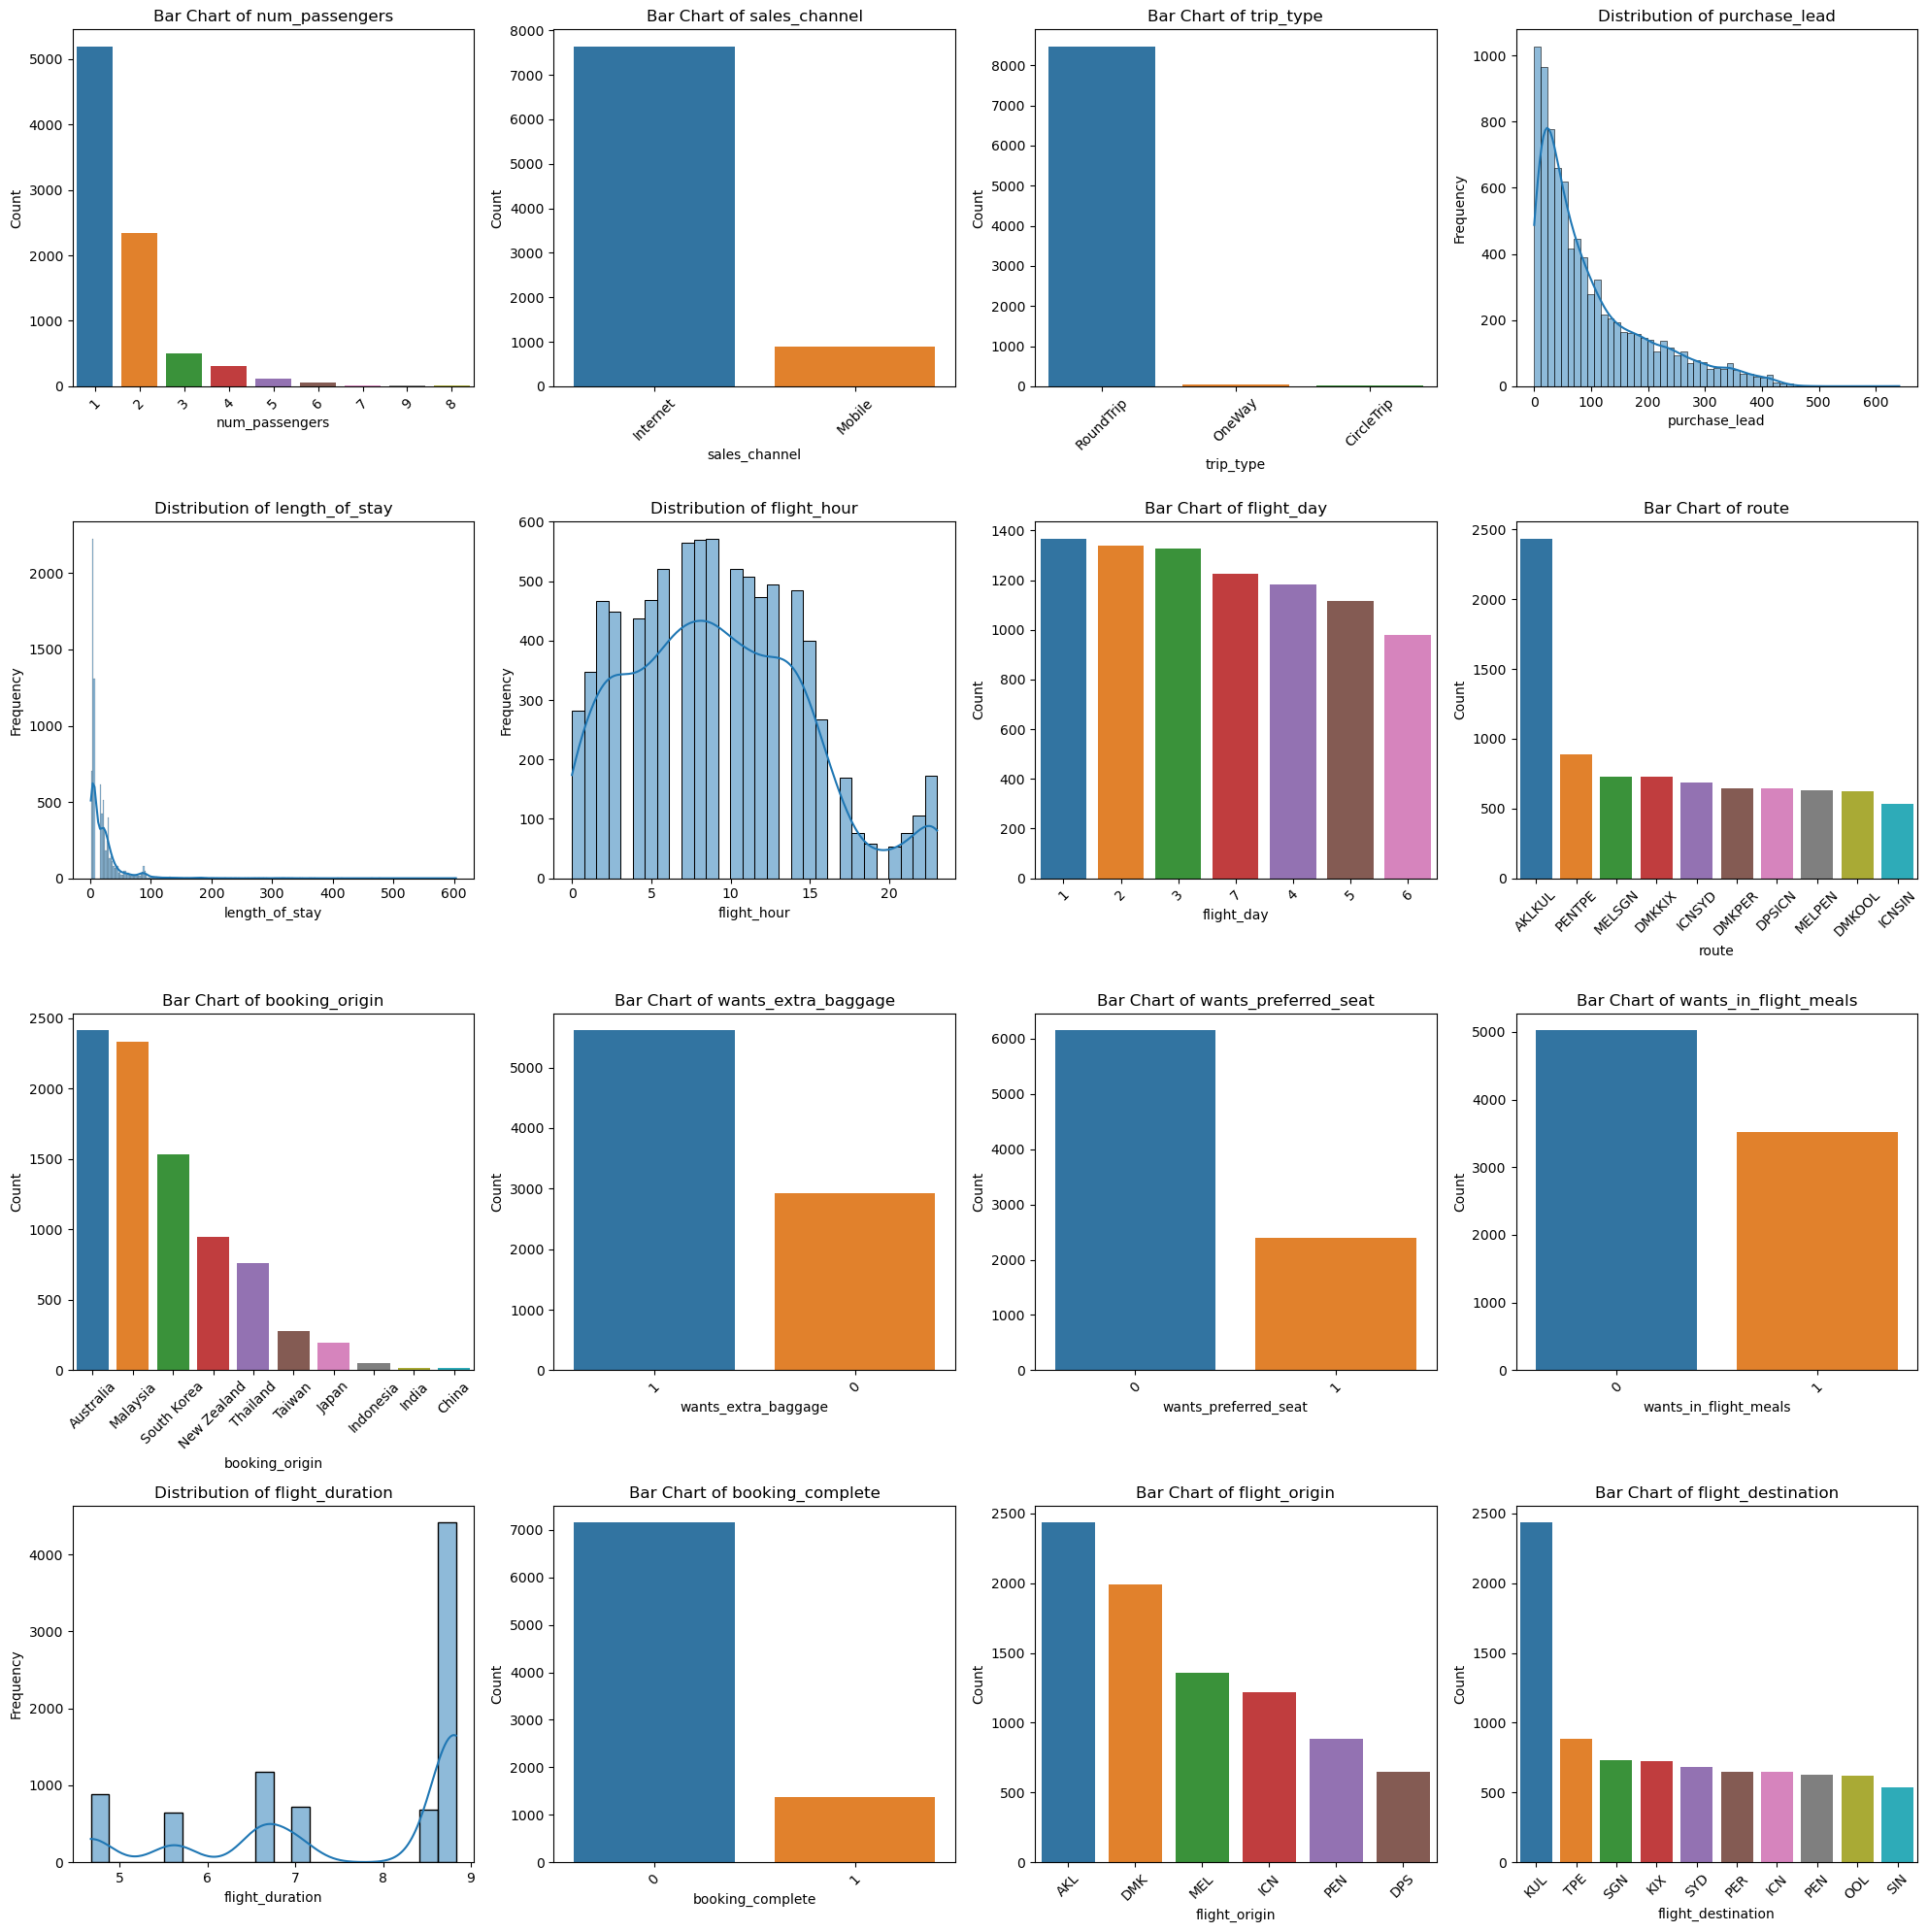

In [15]:
# Filter out only top 10 values for 'route' and 'booking_origin' columns
top_route_values = df['route'].value_counts().nlargest(10).index
top_booking_origin_values = df['booking_origin'].value_counts().nlargest(10).index

df_filtered = df[df['route'].isin(top_route_values) & df['booking_origin'].isin(top_booking_origin_values)]

# Define lists of categorical and numerical columns
categorical_columns = ['num_passengers', 'sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'flight_origin', 'flight_destination', 'wants_extra_baggage', 'wants_preferred_seat', 'route', 'wants_in_flight_meals', 'booking_complete']
numerical_columns = [col for col in df_filtered.columns if col not in categorical_columns]

# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, column in enumerate(df_filtered.columns):
    if column in categorical_columns:
        # Categorical data, plot bar chart
        sns.countplot(x=column, data=df_filtered, order=df_filtered[column].value_counts().index, ax=axes[i//4, i%4])
        axes[i//4, i%4].set_title(f'Bar Chart of {column}')
        axes[i//4, i%4].set_xlabel(column)
        axes[i//4, i%4].set_ylabel('Count')
        axes[i//4, i%4].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    else:
        # Numerical data, plot distribution
        sns.histplot(df_filtered[column], kde=True, ax=axes[i//4, i%4])
        axes[i//4, i%4].set_title(f'Distribution of {column}')
        axes[i//4, i%4].set_xlabel(column)
        axes[i//4, i%4].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
df.shape

(50000, 16)

In [17]:
df = remove_outliers(df,'length_of_stay')

Removed 3807 rows due to outliers in column 'length_of_stay'.


In [18]:
df.shape

(46193, 16)

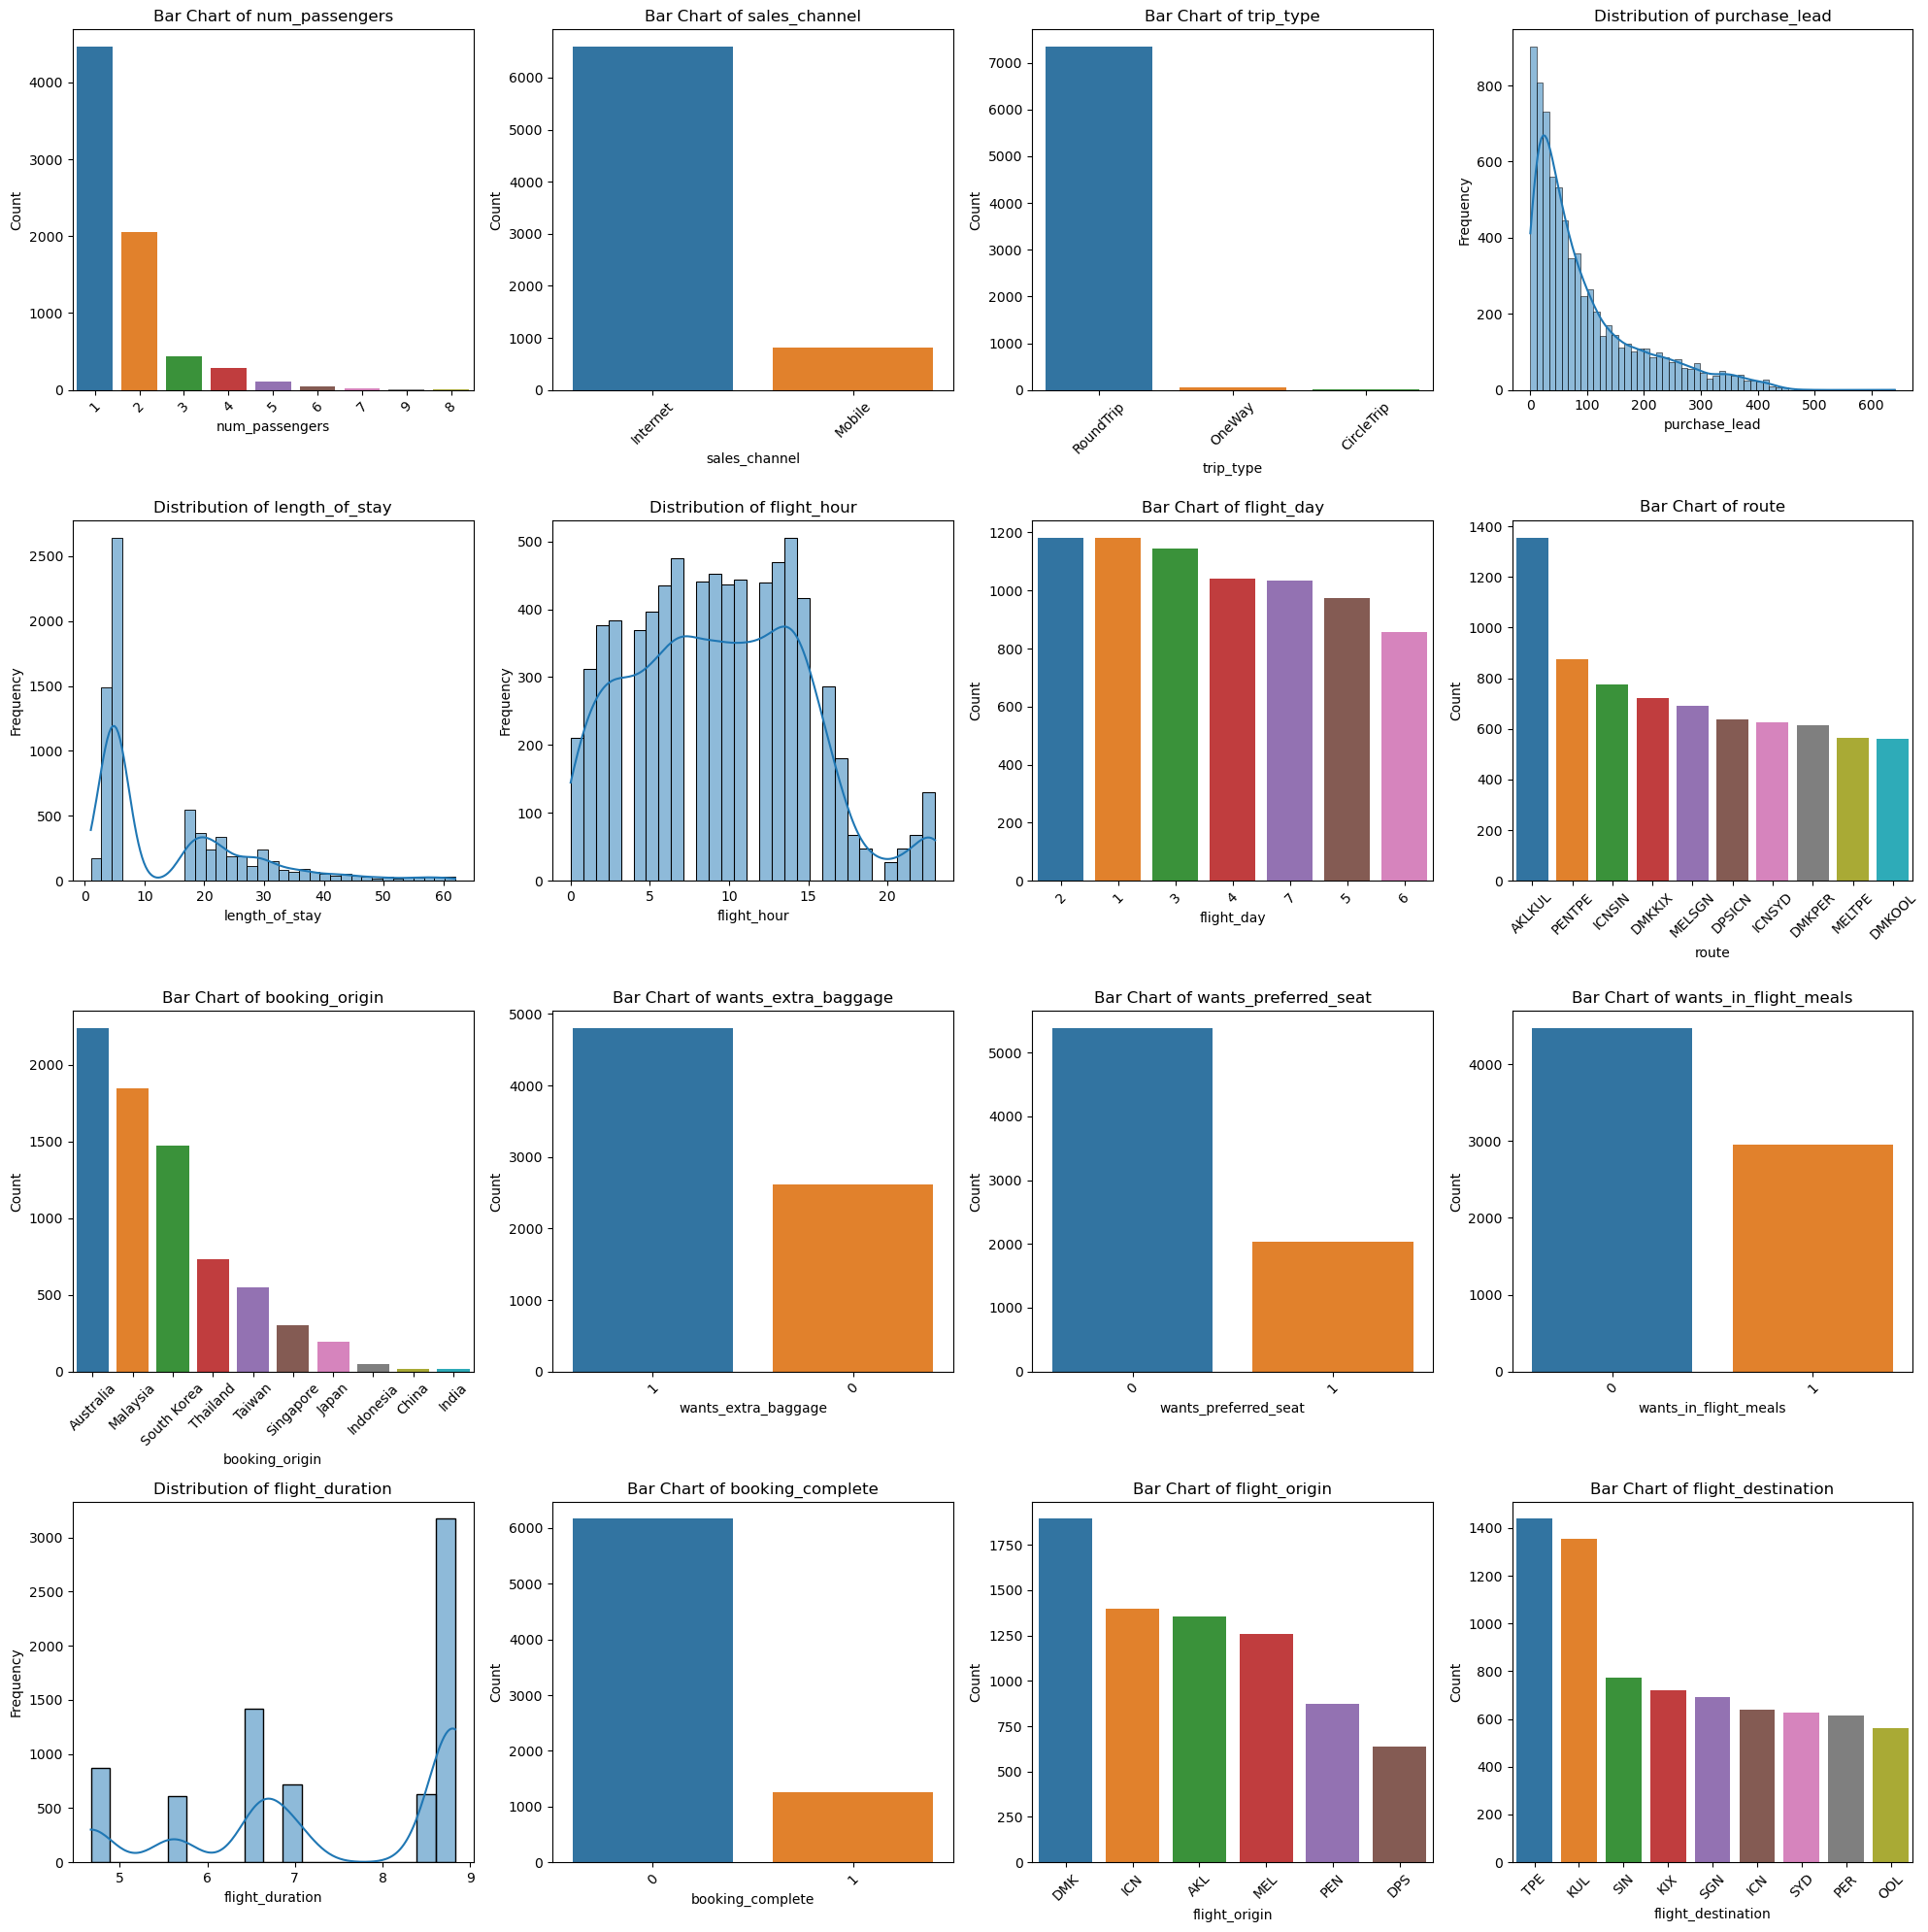

In [19]:
# Filter out only top 10 values for 'route' and 'booking_origin' columns
top_route_values = df['route'].value_counts().nlargest(10).index
top_booking_origin_values = df['booking_origin'].value_counts().nlargest(10).index

df_filtered = df[df['route'].isin(top_route_values) & df['booking_origin'].isin(top_booking_origin_values)]

# Define lists of categorical and numerical columns
categorical_columns = ['num_passengers', 'sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'flight_origin', 'flight_destination', 'wants_extra_baggage', 'wants_preferred_seat', 'route', 'wants_in_flight_meals', 'booking_complete']
numerical_columns = [col for col in df_filtered.columns if col not in categorical_columns]

# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, column in enumerate(df_filtered.columns):
    if column in categorical_columns:
        # Categorical data, plot bar chart
        sns.countplot(x=column, data=df_filtered, order=df_filtered[column].value_counts().index, ax=axes[i//4, i%4])
        axes[i//4, i%4].set_title(f'Bar Chart of {column}')
        axes[i//4, i%4].set_xlabel(column)
        axes[i//4, i%4].set_ylabel('Count')
        axes[i//4, i%4].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    else:
        # Numerical data, plot distribution
        sns.histplot(df_filtered[column], kde=True, ax=axes[i//4, i%4])
        axes[i//4, i%4].set_title(f'Distribution of {column}')
        axes[i//4, i%4].set_xlabel(column)
        axes[i//4, i%4].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df.head()

### Bivariate

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


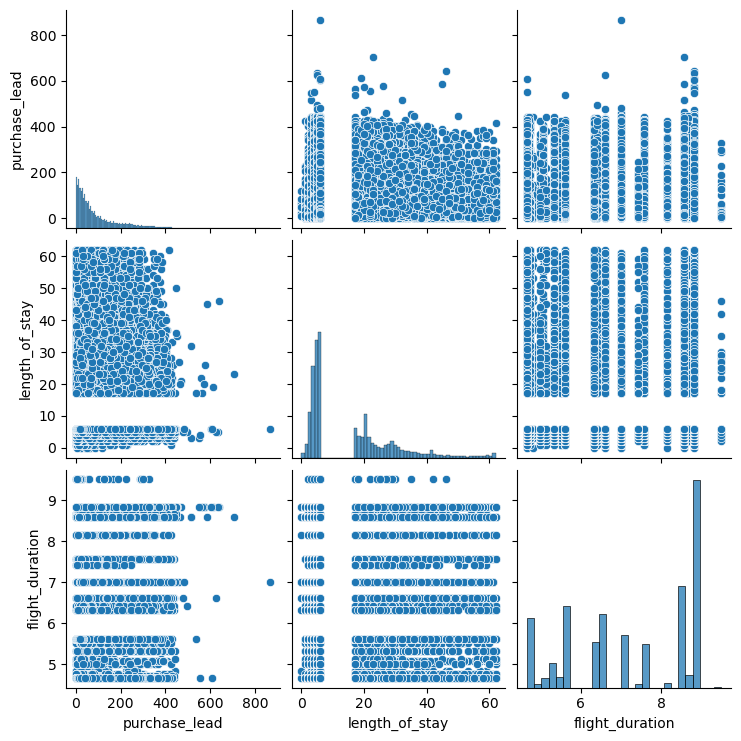

In [22]:
sns.pairplot(df[['purchase_lead','length_of_stay','flight_duration']])

## Auto ML

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'flight_origin', 'flight_destination'],
      dtype='object')

In [25]:
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46193 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         46193 non-null  int64  
 1   sales_channel          46193 non-null  int32  
 2   trip_type              46193 non-null  int32  
 3   purchase_lead          46193 non-null  int64  
 4   length_of_stay         46193 non-null  int64  
 5   flight_hour            46193 non-null  int64  
 6   flight_day             46193 non-null  int64  
 7   route                  46193 non-null  int32  
 8   booking_origin         46193 non-null  int32  
 9   wants_extra_baggage    46193 non-null  int64  
 10  wants_preferred_seat   46193 non-null  int64  
 11  wants_in_flight_meals  46193 non-null  int64  
 12  flight_duration        46193 non-null  float64
 13  booking_complete       46193 non-null  int64  
 14  flight_origin          46193 non-null  int32  
 15  flight_

In [28]:
y = df['booking_complete']
x= df.drop(['booking_complete'],axis=1)
x=StandardScaler().fit_transform(x)

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y, stratify = y,test_size=0.6)

In [56]:
x_train

array([[-0.59203198, -0.3618098 ,  0.09679353, ...,  0.89629112,
        -1.1928073 ,  1.06215045],
       [-0.59203198, -0.3618098 ,  0.09679353, ...,  1.06390459,
         1.03935333,  0.71971138],
       [-0.59203198, -0.3618098 ,  0.09679353, ...,  1.06390459,
         0.39450693, -0.58155706],
       ...,
       [-0.59203198,  2.76388313,  0.09679353, ..., -1.72518344,
         1.88261401,  1.26761389],
       [-0.59203198, -0.3618098 ,  0.09679353, ...,  1.06390459,
         1.03935333, -0.37609362],
       [-0.59203198, -0.3618098 ,  0.09679353, ..., -1.08825228,
        -1.29201443,  0.17180888]])

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifierr
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
random_forest_model.score(x_train, y_train)

1.0

In [59]:
random_forest_model.score(x_test, y_test)

0.8508081974310867

In [60]:
from xgboost import XGBClassifier

# Create an XGBoost Classifier
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgboost_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [61]:
xgboost_model.score(x_train, y_train)

0.913568219949126

In [62]:
xgboost_model.score(x_test, y_test)

0.8456848030018762

In [63]:
from AutoLogging_ML import AutoLogger
a,model=AutoLogger.train_and_log_classification(x_train,y_train,x_test,y_test,size='large')

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

In [64]:
a

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[15706, 0], [0, 2771]]",77.929716,58.210163,58.917581,58.520897,"[[20279, 3281], [2836, 1320]]",precision recall f1-score ...,precision recall f1-score ...
0,naive bayes,82.848947,58.822175,53.815270,54.089336,"[[14966, 740], [2429, 342]]",82.822197,58.692374,53.759500,54.013480,"[[22446, 1114], [3647, 509]]",precision recall f1-score ...,precision recall f1-score ...
10,quadratic discriminant analysis,83.628295,61.577618,54.526322,55.037023,"[[15093, 613], [2412, 359]]",83.435561,60.107066,53.743756,53.912268,"[[22654, 906], [3685, 471]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,98.295178,98.913362,94.405295,96.497091,"[[15700, 6], [309, 2462]]",84.066965,63.842885,55.482529,56.375459,"[[22691, 869], [3547, 609]]",precision recall f1-score ...,precision recall f1-score ...
5,xgboost,91.356822,91.321562,73.026394,78.519007,"[[15582, 124], [1473, 1298]]",84.568480,66.217686,56.213497,57.406265,"[[22786, 774], [3503, 653]]",precision recall f1-score ...,precision recall f1-score ...
8,extra trees classifier,100.000000,100.000000,100.000000,100.000000,"[[15706, 0], [0, 2771]]",84.712801,66.306531,54.871554,55.463959,"[[22970, 590], [3647, 509]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,85.132868,70.971196,51.621899,49.479634,"[[15626, 80], [2667, 104]]",84.994227,67.445723,51.479917,49.284372,"[[23407, 153], [4006, 150]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,85.246523,74.459083,51.718474,49.600959,"[[15645, 61], [2665, 106]]",85.001443,67.536017,51.117545,48.506565,"[[23446, 114], [4043, 113]]",precision recall f1-score ...,precision recall f1-score ...
6,logistic regression,84.997565,42.501082,49.996817,45.945234,"[[15705, 1], [2771, 0]]",85.001443,42.502255,49.997878,45.946368,"[[23559, 1], [4156, 0]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,84.997565,42.501082,49.996817,45.945234,"[[15705, 1], [2771, 0]]",85.005051,42.502526,50.000000,45.947422,"[[23560, 0], [4156, 0]]",precision recall f1-score ...,precision recall f1-score ...


<Axes: xlabel='validation-accuracy', ylabel='model'>

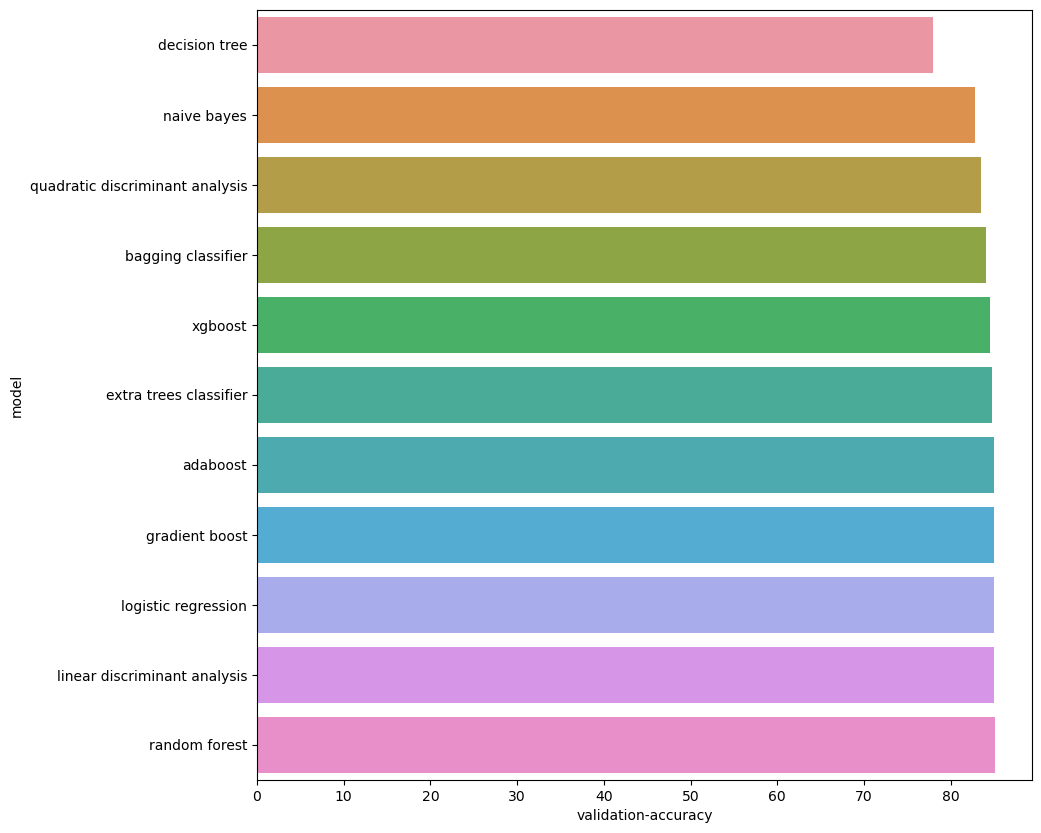

In [65]:
AutoLogger.get_metric_plot_classification(a,'validation','accuracy')